In [1]:
from datetime import datetime
import psycopg2
import pandas as pd
import dotenv
import os
import matplotlib.pyplot as plt
import requests
from requests.auth import HTTPBasicAuth
import seaborn as sns

dotenv.load_dotenv()

True

In [10]:
def get_repos(since=0):
    auth = HTTPBasicAuth(
        os.environ.get("GITHUB_USERNAME"), os.environ.get("GITHUB_TOKEN")
    )
    data = requests.get(f"https://api.github.com/repositories?since={since}", auth=auth)
    data = data.json()

    return data

In [16]:
"""
repo_ids = []
full_names = []

since = 0
for cnt in range(1):
    repo_infos = get_repos(since)
    for repo in repo_infos:
        repo_ids.append(repo["id"])
        full_names.append(repo["full_name"])
        since = repo["id"] + 1
"""

'\nrepo_ids = []\nfull_names = []\n\nsince = 0\nfor cnt in range(1):\n    repo_infos = get_repos(since)\n    for repo in repo_infos:\n        repo_ids.append(repo["id"])\n        full_names.append(repo["full_name"])\n        since = repo["id"] + 1\n'

In [15]:
repo_data = pd.DataFrame({"id": repo_ids, "full_name": full_names})
repo_data.to_csv("./data/repository_data.csv", index=False)
repo_data.head()

,id,full_name
0,1,mojombo/grit
1,26,wycats/merb-core
2,27,rubinius/rubinius
3,28,mojombo/god
4,29,vanpelt/jsawesome


In [17]:
len(repo_data)

100000

In [21]:
def get_repos_star_fork(user_reponame):
    auth = HTTPBasicAuth(
        os.environ.get("GITHUB_USERNAME"), os.environ.get("GITHUB_TOKEN")
    )
    data = requests.get(f"https://api.github.com/repos/{user_reponame}", auth=auth)
    data = data.json()

    return data

In [22]:
get_repos_star_fork(repo_data.full_name[0])

{'id': 1,
 'node_id': 'MDEwOlJlcG9zaXRvcnkx',
 'name': 'grit',
 'full_name': 'mojombo/grit',
 'private': False,
 'owner': {'login': 'mojombo',
  'id': 1,
  'node_id': 'MDQ6VXNlcjE=',
  'avatar_url': 'https://avatars0.githubusercontent.com/u/1?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/mojombo',
  'html_url': 'https://github.com/mojombo',
  'followers_url': 'https://api.github.com/users/mojombo/followers',
  'following_url': 'https://api.github.com/users/mojombo/following{/other_user}',
  'gists_url': 'https://api.github.com/users/mojombo/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/mojombo/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/mojombo/subscriptions',
  'organizations_url': 'https://api.github.com/users/mojombo/orgs',
  'repos_url': 'https://api.github.com/users/mojombo/repos',
  'events_url': 'https://api.github.com/users/mojombo/events{/privacy}',
  'received_events_url': 'https://api.github.com/users/m

In [29]:
repo_ids = []
full_names = []
stargazers_count = []
forks_count = []
watchers_count = []
languages = []

for repo in repo_data.full_name:
    info = get_repos_star_fork(repo)
    if "fork" in info.keys() and not info["fork"]:
        repo_ids.append(info["id"])
        full_names.append(info["full_name"])
        stargazers_count.append(info["stargazers_count"])
        forks_count.append(info["forks_count"])
        watchers_count.append(info["watchers_count"])
        languages.append(info["language"])
    else:
        print(f"failed in {repo}")

failed in bmizerany/sinatra
failed in uggedal/mofo
failed in wayneeseguin/merb-core
failed in KirinDave/yaws
failed in mattetti/ruby-on-rails-tmbundle
failed in bmizerany/simply_versioned
failed in simonjefford/ruby-on-rails-tmbundle
failed in kevinclark/god
failed in brosner/django-mptt
failed in josh/rails
failed in anotherjesse/exception_logger
failed in halorgium/god
failed in kmarsh/git-wiki
failed in halorgium/merb-core
failed in jnicklas/merb-more
failed in jnicklas/merb-core
failed in sr/merb-more
failed in abhay/chronic
failed in adelcambre/rubyurl
failed in reinh/dm
failed in xraid/merb-core
failed in al3x/git-wiki
failed in KirinDave/bus-scheme
failed in jdhuntington/bus-scheme
failed in jackdempsey/merb-core
failed in anotherjesse/git-wiki
failed in sxross/ruby-on-rails-tmbundle
failed in piclez/merb-core
failed in piclez/merb-more
failed in piclez/merb-plugins
failed in rmanalan/restful-authentication
failed in rmanalan/facebox
failed in labria/restful-authentication
faile

failed in eastmedia/git-tmbundle
failed in ehlo/insoshi
failed in henrik/rails
failed in madrobby/prototype
failed in blueguru/cmsmadesimple-2-0
failed in jf/chronic
failed in vlad4/insoshi
failed in prof3sorul/school
failed in prof3sorul/mentor
failed in atduskgreg/portable-google-app-engine-sdk
failed in drodriguez/gitnub
failed in petertodd/vimfiles
failed in pete1/github-unfuddle
failed in asanghi/lovd-by-less
failed in predhme223/rails
failed in halfbyte/mm-baseline
failed in gwynm/merb-plugins
failed in cjmiyake/insoshi
failed in xwmx/attachment_fu
failed in cardmagic/merb_paginate
failed in TomK32/feedme
failed in bytheway/merb-core
failed in nbudin/jester
failed in dalen/familytree
failed in Soleone/xml_node
failed in nonuts/gosutaxi
failed in gwynm/webrat
failed in gerrit/facebox
failed in ianwhite/rspec
failed in ianwhite/rspec-rails
failed in DefV/utility_scripts
failed in mattetti/will_paginate
failed in drnic/rubyamp
failed in acgourley/watchdog
failed in abradburne/will_p

failed in GeekyTrend/rails
failed in jamesmacaulay/radiant-rss-reader
failed in jeresig/processing-js
failed in jrk/git-wiki
failed in jamesmacaulay/liquid
failed in ryanwood/data_table
failed in captproton/lovd-by-less
failed in xjunior/autotest-notification
failed in rayvinly/will_paginate
failed in caffo/sinatra
failed in kraudio/webmaster_tools
failed in willis/java-memcached-client
failed in robertgaal/sass-textmate-bundle
failed in ericallam/processing-js
failed in reynardmh/ultrasphinx
failed in niklas/acts_as_configurable
failed in richpoirier/have_filter
failed in dalager/oiorest
failed in tobiashm/oiorest
failed in MichaelAronsen/oiorest
failed in jacobat/oiorest-rails-examples
failed in pepperone/radiant-gallery
failed in tobiashm/oiorest-rails-examples
failed in Orcateers/alonetone
failed in ultralaise/googlecharts
failed in olleolleolle/oiorest-rails-examples
failed in olleolleolle/oiorest
failed in halorgium/thor
failed in nex3/thor
failed in fiveohg/insoshi
failed in hen

failed in dgiunta/server-status-plugin
failed in bronson/ctest
failed in aflatter/feather-plugins
failed in fireeagleirc/fireeagle-irc-bot
failed in luislavena/win32console
failed in davidlee/datepicker
failed in michaelboutros/titlecase
failed in walf443/github-post-reciever
failed in bronson/tmtest
failed in sebasmagri/portage
failed in death/copypathname
failed in death/brizo
failed in death/smirk
failed in death/sfvtool2
failed in criscokid/rubypresentation
failed in death/brizo-older
failed in death/function-replacer
failed in death/sde
failed in death/vbref
failed in death/webwatch
failed in seven1m/my_snippets
failed in sunfmin/readtracking
failed in kjk/ars-framework
failed in kjk/ipedia-palm
failed in kjk/moriarty-sm
failed in kjk/moriarty-palm
failed in imkite/ibox-rails-plugin
failed in nbibler/devpay
failed in kjk/noah-palm
failed in kjk/inoah-sm
failed in bakineggs/bakineggs.com
failed in kjk/ipedia-sm
failed in timcharper/calendar_date_select_demo
failed in activescaffold

failed in hanneswu/insoshi
failed in joelw/database_form
failed in jarkko/dm-core
failed in diasjorge/bash-completion-extras
failed in dbora/mephisto
failed in cmorss/dm-core
failed in nogoth/gitjour
failed in u196598/insoshi
failed in duncanbeevers/prototype
failed in methodmissing/rails
failed in peter123/rails
failed in drnic/gitjour
failed in chaupt/rakismet
failed in francois/github-fogbugz
failed in barto/agility2
failed in xauz/poignant-br
failed in tiendung/ajax-rdoc
failed in shayarnett/merbful_authentication
failed in sudara/scripty2
failed in dslife/blog-starter-kit
failed in jasherai/jquery-microformats
failed in ujihisa/vim-flymake
failed in pnowak2/globalite
failed in chmurph2/tilda-bin
failed in texel/gchart
failed in imkite/system_messages
failed in imkite/acts_as_dismissible
failed in nogoth/pastejour
failed in alexvollmer/gitjour
failed in mza/sprolog
failed in nogoth/gemjour
failed in drnic/gemjour
failed in jf/feather
failed in myobie/factories-and-workers
failed in

failed in e12win/acts_as_state_machine
failed in fhwang/activescaffold
failed in mbsullivan/sparklemotion
failed in stigi/monomer
failed in guan/active_scaffold
failed in jdhuntington/rinari
failed in crispinheneise/paperclip
failed in akil-zz/qtwebkit
failed in h-lame/rails-sqlserver-adapter
failed in open80/slugger
failed in austinrfnd/kablame-gem
failed in edavis10/tracks
failed in ripta/johnson
failed in harm/exception_logger
failed in canadaduane/rubydoctest
failed in revolutionhealth/resources_controller
failed in raggi/thin
failed in revolutionhealth/acts_as_paranoid
failed in kad3nce/openid_dm_store
failed in dougjohnston/restful-authentication
failed in jomz/navigation_tags
failed in GUI/mini_magick
failed in GUI/attachment_fu
failed in warrenfromaustin/scriptaculous
failed in bcurren/cruisecontrolrb_perforce
failed in remco-xx/insoshi
failed in danielegozzi/radiant-extensions
failed in saimonmoore/waves
failed in nick/mephisto
failed in quamen/starjour
failed in eadz/permalin

failed in jakehow/googlecharts
failed in Kishore/inplacericheditor
failed in mattallen/workflow
failed in shigin/thrift
failed in edgerunner/globalite
failed in pkqk/passengerpane
failed in kyoleelqh/openid-rails-kit
failed in jstewart/princely
failed in simo2409/exception_notification
failed in jugglebird/restful-authentication
failed in setsail/ultrasphinx
failed in henrik/paperclip
failed in shachi/natsulion
failed in bjtitus/fftogo
failed in bmizerany/rush
failed in jimweirich/rake
failed in kana/ujihisa-vim-quickrun
failed in fabianbuch/rufus-rtm
failed in jcnetdev/app_config
failed in jcnetdev/paperclip
failed in jcnetdev/auto_migrations
failed in malditogeek/interlock
failed in jcnetdev/restful-authentication
failed in DrMark/partially_valid
failed in hrmc/javascript_test
failed in codeprimate/acts_as_nested_set
failed in lamsek/lift-samples
failed in rajeev/mootools-core
failed in dustin/pastejour
failed in pascal-alm/merb_paginate
failed in dustin/gitjour
failed in pedro/rspec

failed in xwmx/subdomain-fu
failed in lightningdb/calendar_date_select
failed in ujihisa/git-vim
failed in fivepointssolutions/serve
failed in unders/semantic-form-builder
failed in kwicher/bioruby
failed in rladell/ruboss_framework
failed in rladell/ruboss_rails_integration
failed in wireframe/acts_as_state_machine
failed in KirinDave/steezy-pibb
failed in FooBarWidget/data_fabric
failed in jugglebird/radiant
failed in kennethkalmer/google_analytics
failed in zdennis/seed-fu
failed in zero411/insoshi
failed in jeffbski/sinatra
failed in pnasrat/facter-old
failed in esden/arc
failed in alk/rcov
failed in ealameda/restful-authentication
failed in elkinsware/starling
failed in benstein/camptweet
failed in duncanbeevers/single-table-inheritance-cleaver
failed in look/acts_as_solr
failed in jeremylightsmith/phpunit-tmbundle
failed in shanev/youtube-g
failed in shanev/facebooker
failed in jchris/slipcover
failed in coreymartella/lucifer
failed in Dawid/spacer
failed in collin/poolparty
fail

failed in nickretallack/bluff
failed in nick-b/rubyflow
failed in saturnflyer/radiant-extension-registry
failed in andyfam/wuyao
failed in libin/rubynews.cn
failed in jdthomas/watchdog
failed in queso/auto_follow
failed in rpm33/blooxm
failed in edward/archaeopteryx
failed in elitau/masochism
failed in yugui/rubyspec
failed in relevance/blue-ridge
failed in chapados/nusax
failed in Nitaym/xpwn
failed in zachinglis/ack-tmbundle
failed in crowdvine/rfeedparser
failed in pkieltyka/as3-amqp
failed in kyleslattery/phpviddler
failed in MGwynne/oklibrary
failed in jsollano/insoshi
failed in flavorjones/yasnippets-rails
failed in xdite/communityengine
failed in jimbob/barcamporlando-scheduler
failed in nick-b/insoshi
failed in jeffbski/webby
failed in guan/rubyamf_quickly
failed in tricycle/rspec-integration
failed in ayarritu/insoshi
failed in takeo/steezy-pibb
failed in voitto/php_backup_s3
failed in smtm/rails-iui
failed in mwalker/gittle
failed in mabels/activerecord-jdbc-adapter
failed in

failed in frandieguez/googlepagerank
failed in vbabiy/django_blog
failed in JamesHarrison/eve_killmail_parser
failed in imajes/jibot
failed in mikeymckay/earworm
failed in Arcath/arcath.net-site-cms
failed in edmz/csv2lighthouse
failed in laurynasl/hornsby
failed in Floppy/currentcost-ruby
failed in rpj/gitsandbox
failed in technicalpickles/rubyflow
failed in supramap/supramap
failed in jaz303/rif
failed in jacques/connector
failed in dsabanin/configuration-file-plugin
failed in mmangino/er-scout-plugins
failed in mbentz80/jzigbeercp
failed in nickmerwin/merconf_red5
failed in dbussink/dm-constraints
failed in nickmerwin/merconf_client
failed in fitmodel25/myspace
failed in andrefonseca/social-feed-reader
failed in nakajima/test-js
failed in jacques/nagios-sms
failed in jacques/uptime-sms
failed in queso/ym4r-gm
failed in byennen/xploreu
failed in zhangxue/openid-rails-kit
failed in alawrenc/nao-man
failed in dctanner/aws-s3
failed in genki/ssl_requirement
failed in therealadam/dallasr

failed in rpj/epic-audio
failed in chaddorsey/otrunk-examples
failed in rpj/c-ga
failed in harrikauhanen/background-fu
failed in rpj/pl-source-count
failed in rpj/ruby-lcd
failed in TesterBill/test1
failed in raggi/facon
failed in elevation/bookmasters_ruby
failed in kwatch/kwery
failed in miloops/share-this
failed in avonderluft/radiant-page_list_view-extension
failed in rocky/zshdb
failed in jeremylightsmith/fakeui
failed in kristinalim/schedule_attribute
failed in digitalscientists/rails_caching
failed in nirvdrum/ruby-aws
failed in jimweirich/flexmock
failed in robertkrimen/Getopt-Chain
failed in farktronix/webjuke
failed in rcoder/pdxruby
failed in jgm/rpeg-markdown
failed in MaxEgan/insoshi
failed in Inviz/ude
failed in neokewlsam/fileserver
failed in killercup/conescy
failed in hadley/classifly
failed in jorge-zz/xpwn
failed in ymendel/truthy_talk
failed in jeremyevans/exception_notification
failed in hadley/clusterfly
failed in hadley/decumar
failed in wolfdancer/selenium
faile

failed in bjeanes/abn
failed in lpicanco/grails
failed in segfault/cruisecontrol.rb
failed in vanntastic/blueprint-css
failed in littlefyr/radiant-location-extension
failed in mtodd/jps
failed in bitfyre/my-ui-library
failed in baldowl/gem_leaves
failed in joakimk/hoptoad_notifier_merb
failed in Fingertips/nap
failed in tucson-jug/xstring
failed in hrkfdn/cpcheat
failed in dekart/mypetstudio
failed in filiperocha/testing
failed in steini/cash
failed in brotherlogic/wants-lists
failed in lethain/django-syntax-colorize
failed in rizqme/chain.js
failed in Pistos/ruby-dbi
failed in alflol/learning-rails-sample-app
failed in blackwinter/apache_secure_download
failed in shenie/campaign-monitor-ruby
failed in dstrelau/spare-parts
failed in ohlhaver/killerapp
failed in sergeygershun/acts_as_recognizable
failed in paramaw/rails
failed in mislav/async-upload
failed in giallu/supybot-mantis
failed in indmill/finder_filter
failed in dragon3/webservice-backlog
failed in c3mediagroup/learning-rails-

failed in jamesdouma/gap
failed in hedley/has_many_polymorphs
failed in yanick/greaseyanick
failed in erlware-deprecated/faxien
failed in josefsi012/rampholdconverter
failed in kuahyeow/acts-as-taggable-on
failed in inkspot/alumina
failed in rorcraft/autocomplete.localadvanced
failed in emice/tasty-shop
failed in 53cr/generate-vhosts
failed in lincolnloop/django-locations
failed in rorcraft/scriptaculous
failed in jeremylightsmith/chizzle
failed in jeremylightsmith/sinkr.cocoa
failed in phuang/ibus-hangul
failed in nvd50129/myapp
failed in addywaddy/webrat
failed in robertkrimen/hash-param
failed in soregrapes/mack_blog_demo
failed in mfbDev/earth
failed in psi-im/psi
failed in jrudolph/bytecode
failed in psi-im/iris
failed in seasons-zz/seasons_fishing
failed in elind/tech_debt
failed in philsmy/acts_as_state_machine
failed in elind/tech_debt_app
failed in grzegorzkazulak/gadu-api
failed in wuts/earthquake
failed in StaticFiend/grimfiend
failed in siebertm/post_receive_hook
failed in 

failed in quinn/scoped_taggables
failed in arturaz/smsd
failed in kanru/ibus-chewing
failed in darkk/redsocks
failed in manveru/ehttp
failed in MadRabbit/frontcompiler
failed in danwoolley/json_printer
failed in saturnflyer/radiant-comments
failed in tylerhunt/germinate
failed in codemuseum/datetimerange-tsapp
failed in soila/warbler
failed in ElectricDesk/depot
failed in basecamp/libmemcached_store
failed in metaphiz/acts_as_union
failed in apenwarr/cron2rss
failed in thilo/webrat
failed in paulca/hubahuba
failed in jao/codegolf
failed in markbates/miki
failed in berlinbrown/physicsforprogrammers
failed in archoner/xpwn
failed in tarcieri/cool.io
failed in paulca/formatted-dates
failed in spatten/aws-s3
failed in spatten/ec2onrails
failed in NathanaelB/twfy
failed in NathanaelB/openaustralia-parser
failed in PhilGeek/illusion
failed in lethain/comfy-django-example
failed in tmm1/jssocket
failed in Eugenia/langen
failed in drnic/sake-tasks
failed in dnaziozeno/ateamscp
failed in julioc

failed in yappo/gitgit
failed in kzys/memcacheb
failed in yar/i18n_db
failed in johnreilly/cruisecontrol.rb
failed in jyurek/basecamper
failed in oddlyzen/rails
failed in mrchucho/rbot-plugins
failed in Chandrashekar/time-tracking-system
failed in bobmcwhirter/vfs
failed in snusnu/dm-is-commentable
failed in robertkrimen/file-builtin-sugar
failed in thegeekinside/elfo
failed in IndyHallLabs/jsonkit
failed in joenoon/url_safe_base64
failed in haruska/aws-s3
failed in godazas/ghost
failed in jhuckabee/exhibit
failed in leword/globalize2
failed in aviflombaum/scrape-framework
failed in tonibergholm/luokitellut
failed in pelargir/textile_toolbar
failed in tonibergholm/tyolletekija
failed in entombedvirus/git-sentinel
failed in tonibergholm/trainerstool
failed in crix/flickr-api-access--php-
failed in animesh/cqncer
failed in nicholaides/dm-core
failed in kastner/rjs_demo
failed in azerock/bittwit
failed in kennethkalmer/synaptein
failed in FooBarWidget/daemon_controller
failed in smbrant/r

failed in ryanraaum/oldowan.structure
failed in jc00ke/hashy
failed in ryanraaum/oldowan.display
failed in edspencer/worker_queue
failed in paytonrules/selenium-on-rails
failed in foeken/recurring_events_parser
failed in koduki/pascaloon
failed in wilson/rake
failed in Dieterbe/ddm
failed in llimllib/cherry-blossom
failed in inigo/olympic-mashup
failed in progmatica/rails_install_fest
failed in halfbyte/lcddogmspi
failed in fredbarber/rspec
failed in oliver/gedit-file-search
failed in rwestgeest/dm-core
failed in kwatch/wordbless
failed in rwestgeest/dm-more
failed in joahking/radiant-gallery
failed in almacbe/favpal-mod
failed in almacbe/phpbb-with-favpal-mod
failed in weplay/rspec
failed in weplay/rspec-rails
failed in ab5tract/waves
failed in b1kleg1tb16/b16
failed in jquery/sizzle
failed in litan/scrisca
failed in tmoertel/pxsl-tools
failed in ssoriche/test-output
failed in glguy/punionfind
failed in cadar/hello-lfe
failed in atiaxi/kuiper
failed in nono/don-t-break-the-chain
faile

failed in neosam/s3d
failed in riklomas/quicksearch
failed in fred/blog
failed in jgarber/radiant-redcloth4-extension
failed in harlanji/harlan-sandbox
failed in chrizel/moelisp
failed in neosam/moelisp
failed in playpauseandstop/djake
failed in harlanji/xmpp4js
failed in mort/arritmia
failed in subelsky/sproutcore
failed in subelsky/sproutcore-buildtools
failed in codemuseum/customers-tsapp
failed in markoa/wordtip
failed in KaVo/test
failed in myers/fixtures_and_mocks
failed in KaVo/ghost
failed in jmiller/mephisto
failed in adaptive/email-extractor-php
failed in threez/rload
failed in kapilt/tm-completion
failed in rafaelss/siniki
failed in timcharper/gitosis.vim
failed in cmak/chris.makarsky.com
failed in oldmoe/mysqlplus
failed in wizardofcrowds/rufus-sqs
failed in jwiegley/markdown.net
failed in jwiegley/disk-catalog
failed in dougjohnston/ssl_requirement
failed in Empact/roxml
failed in neosam/lisp3d
failed in atnan/ghostie
failed in jwiegley/git-scripts
failed in mumoshu/kokodo

failed in ctcherry/rattl
failed in eyberg/erlreis
failed in bmizerany/sinatra-template-vendor
failed in andreyvit/yoursway-builder
failed in mislav/rspec-rails-mocha
failed in jmorton/academic
failed in mattrepl/clojure-mode
failed in andreyvit-ghtest/yoursway-builder
failed in jmettraux/rufus-treechecker
failed in turker/acilkan
failed in mergulhao/rcov
failed in smoothdvd/jwtube
failed in akitaonrails/redmine
failed in aq1018/dm-is-slug
failed in emyller/mandoo
failed in xli/dtr
failed in asharpe/flicker
failed in thedifferentpath/leafm
failed in ujihisa/vim-metarw-nowa
failed in bdilly/dividingbills
failed in nakajima/shoe-boxer
failed in positivelabs/oeonalomeuboeu
failed in qingfeng/rtm.tmbundle
failed in roidrage/capistrano
failed in quix/quix
failed in quix/comp_tree
failed in rscottbelford/twitmyride
failed in FilipDeVos/sqlserverhelperscripts
failed in stsquad/my-emacs-stuff
failed in dmilor/footie-news
failed in ciaran/jukebot
failed in fourdman/yoursway-builder
failed in fou

KeyboardInterrupt: 

In [30]:
star_fork_infos = pd.DataFrame({
    "id": repo_ids,
    "full_name": full_names,
    "stargazers_count": stargazers_count,
    "forks_count": forks_count,
    "watchers_count": watchers_count,
    "language": languages,
})

star_fork_infos.to_csv("./data/star_fork_infos.csv", index=False)
star_fork_infos.head()

,id,full_name,stargazers_count,forks_count,watchers_count,language
0,1,mojombo/grit,1899,526,1899,Ruby
1,26,wycats/merb-core,405,55,405,Ruby
2,27,rubinius/rubinius,2910,594,2910,C
3,28,mojombo/god,2145,491,2145,Ruby
4,29,vanpelt/jsawesome,36,2,36,JavaScript


In [32]:
len(star_fork_infos)

6893

In [49]:
owners = []
for i in range(len(repo_data)):
    owners.append(repo_data["full_name"][i].split("/")[0])

In [52]:
user_info = pd.DataFrame({"username": list(set(owners))})
user_info.to_csv("./data/user_info.csv", index=False)
user_info.head()

,username
0,collymore
1,sujanucsc
2,Theorem
3,mussawir20
4,bytheway


In [56]:
start = 0
end = 1000  # limit of request to GitHub API per hour

created_at = []
updated_at = []
star_nums = []

auth = HTTPBasicAuth(
    os.environ.get("GITHUB_USERNAME"), os.environ.get("GITHUB_TOKEN")
)

for i in range(start, end):
    dates = requests.get(f"https://api.github.com/users/{user_info.username[i]}", auth=auth).json()
    created_at.append(dates["created_at"])
    updated_at.append(dates["updated_at"])
    
    page = 1
    star = 0
    while True:
        data = requests.get(f"https://api.github.com/users/{user_info.username[i]}/starred?per_page=500&page={page}", auth=auth)
        data = data.json()
        
        star += len(data)
        if len(data) < 500:
            break
        
        page += 1
    
    star_nums.append(star)

In [58]:
user_info_1 = pd.DataFrame({
    "username": user_info.username[:1000],
    "star": star_nums,
    "created_at": created_at,
    "updated_at": updated_at,
})

user_info_1.head()

,username,star,created_at,updated_at
0,collymore,8,2009-02-19T16:16:06Z,2020-09-26T11:37:56Z
1,sujanucsc,9,2009-03-12T16:20:20Z,2020-08-16T18:30:00Z
2,Theorem,0,2018-03-15T21:04:11Z,2020-07-28T05:07:27Z
3,mussawir20,1,2009-05-03T00:01:17Z,2020-09-18T14:41:17Z
4,bytheway,100,2008-04-04T17:43:29Z,2020-09-24T13:30:55Z


In [59]:
user_info_1.to_csv("./data/user_info_1.csv", index=False)

/home/yudai/Documents/Python/github_api/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


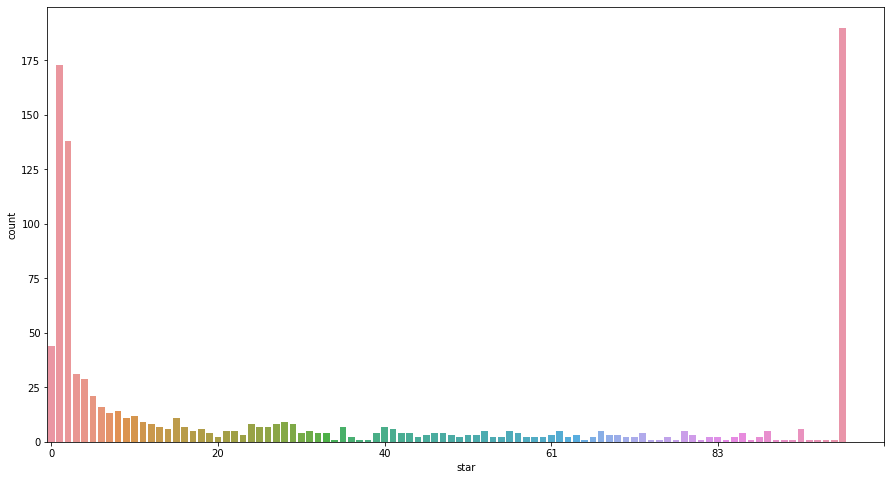

In [72]:
plt.figure(figsize=(15, 8))
sns.countplot(user_info_1.star)
plt.xticks([0, 20, 40, 60, 80, 100], rotation=0)
plt.show()

Star数が100のユーザーが多いのは、APIで一度に取れるスターをつけたリポジトリの数が最大１００だから。Star数が100のユーザーに関してはあとでもう一度取り直す

In [73]:
user_info_1[user_info_1.star >= 100][:10]

,username,star,created_at,updated_at
4,bytheway,100,2008-04-04T17:43:29Z,2020-09-24T13:30:55Z
9,nilclass,100,2009-07-14T17:28:37Z,2020-09-03T08:15:35Z
12,osnr,100,2009-06-19T00:15:12Z,2020-09-26T08:39:26Z
24,osteele,100,2008-02-23T17:08:42Z,2020-09-23T03:39:07Z
33,jpetso,100,2009-05-24T20:23:21Z,2020-08-19T02:04:21Z
40,dannysmith,100,2008-10-08T12:56:33Z,2020-08-26T17:22:56Z
42,CHH,100,2008-07-11T14:26:22Z,2020-08-25T12:12:58Z
49,minhajuddin,100,2009-01-03T09:49:30Z,2020-09-19T01:46:08Z
61,bdrewery,100,2008-11-10T19:23:57Z,2020-08-11T15:38:49Z
70,mattmueller,100,2009-01-10T13:52:13Z,2020-09-16T16:47:10Z
